In [1]:
from MIND import compute_MIND
from get_vertex_df import get_vertex_df
import os
import pandas as pd
import networkx as nx
import nibabel.freesurfer.io as fsio
import numpy as np

features = ['CT','Vol','SA','MC','SD']
parcellation = 'aparc'
annot_file = r'C:\Users\efeka\Desktop\TubitakData\2025.01.03_mri_patients_features\tubitak_fs\ABDULKADIR_CALISKAN_folder\label\lh.aparc.annot'

labels, ctab, region_names = fsio.read_annot(annot_file)
surf_dir = r'\\wsl$\Ubuntu-22.04\home\efekan\tutorial\tutorial_data_20190918_1558\buckner_data\tutorial_subjs\good_output'

### CHECK ROI NUMBERs

In [3]:
from MIND import compute_MIND
import os

# surf_dir = r'\\wsl$\Ubuntu-22.04\home\efekan\adni'
surf_dir = r'C:\Users\efeka\Desktop\TubitakData\2025.01.03_mri_patients_features\tubitak_fs'
features = ['CT', 'Vol', 'SA', 'MC', 'SD']
parcellation = 'aparc'

# Get all subject directories, excluding 'fsaverage' and any shell scripts
subject_ptids = os.listdir(surf_dir)
subject_ptids = [i for i in subject_ptids if (i != 'fsaverage' and '.sh' not in i)]

processed_subjects = 0
for id in subject_ptids:
    # print(f"Processing {id}...")
    subject_dir = os.path.join(surf_dir, id)
    surf_files_dir = os.path.join(subject_dir, 'surf')
    # Skip if surf_files_dir doesn't exist or is empty
    if not os.path.isdir(surf_files_dir) or not os.listdir(surf_files_dir):
        continue
    if not os.path.isdir(os.path.join(subject_dir,'label')) or not os.listdir(os.path.join(subject_dir,'label')):
        continue
    if not os.path.isdir(os.path.join(subject_dir,'surf')) or not os.listdir(os.path.join(subject_dir,'surf')):
        continue
    vertex_data, regions, features_used  = get_vertex_df(subject_dir, features, parcellation)
    processed_subjects += 1
    # Check whether region number is 68, else warning
    if len(np.unique(regions)) != 68:
        print(f"Warning: Region number is not 68 for subject {id}.")
        continue
    # Check if vertex_data contains 68 unique regions
    if len(np.unique(vertex_data['Label'].values)) != 68:
        print(f"Warning: Vertex data does not contain 68 unique regions for subject {id}.")
        continue

processed_subjects


USED REGIONS:
34 33
USED LABELS:
34 33
REGION NAMES
36 36
annot [9221140 9221140 9221140 ... 9231540 7874740 9182740] [1639705, 2647065, 10511485, 6500, 3294840, 6558940, 660700, 9231540, 14433500, 7874740, 9180300, 9182740, 3296035, 9211105, 4924360, 3302560, 3988500, 3988540, 9221340, 3302420, 1326300, 3957880, 1316060, 14464220, 14423100, 11832480, 9180240, 8204875, 10542100, 9221140, 14474380, 1351760, 6553700, 11146310, 13145750, 2146559]
USED REGIONS:
34 33
USED LABELS:
34 33
REGION NAMES
36 36
annot [9221140 9221140 9221140 ... 3302560 1316060 8204875] [1639705, 2647065, 10511485, 6500, 3294840, 6558940, 660700, 9231540, 14433500, 7874740, 9180300, 9182740, 3296035, 9211105, 4924360, 3302560, 3988500, 3988540, 9221340, 3302420, 1326300, 3957880, 1316060, 14464220, 14423100, 11832480, 9180240, 8204875, 10542100, 9221140, 14474380, 1351760, 6553700, 11146310, 13145750, 2146559]
USED REGIONS:
34 33
USED LABELS:
34 33
REGION NAMES
36 36
annot [9221140 9221140 9221140 ... 3302560 131

KeyboardInterrupt: 

### FS Tutorial

In [ ]:
# vertex_data, regions, features_used  = get_vertex_df(surf_dir, features, parcellation)

In [4]:
vertex_data, regions, features_used  = get_vertex_df(surf_dir, features, parcellation)

(9205, 6)
Axes(0.125,0.11;0.775x0.77)


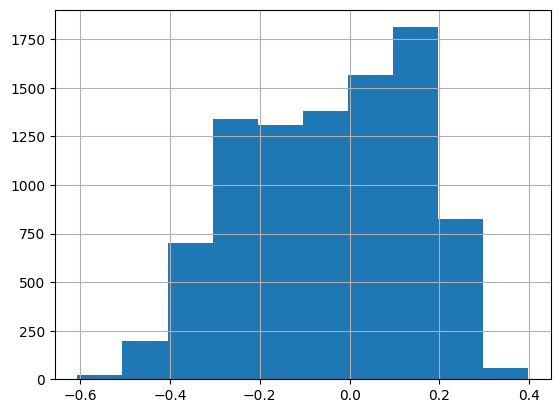

In [9]:
# print histogram of vertex_data[vertex_data['Label'] == 'lh_lateraloccipital']
print(vertex_data[vertex_data['Label'] == 'lh_lateraloccipital'].shape)
# print histogram of vertex_data[vertex_data['Label'] == 'lh_lateraloccipital']['Feature_0']
print(vertex_data[vertex_data['Label'] == 'lh_lateraloccipital']['Feature_3'].hist())


In [23]:
str_list = [x.decode('utf-8') for x in region_names]
str_list = set(str_list)

In [ ]:
listof_mind_roi = [x.split('_')[1] for x in vertex_data[0]['Label'].unique()]
listof_mind_roi = (set(listof_mind_roi))

In [26]:
listof_mind_roi - str_list

set()

In [2]:
mind_graph_filtered = compute_MIND(surf_dir, features, parcellation, filter_vertices=True)
mind_graph_unfiltered = compute_MIND(surf_dir, features, parcellation, filter_vertices=False)

Feature conversion dictionary:
{'CT': 'Feature_0', 'Vol': 'Feature_1', 'SA': 'Feature_2', 'MC': 'Feature_3', 'SD': 'Feature_4'}
Computing MIND...
Done!
Feature conversion dictionary:
{'CT': 'Feature_0', 'Vol': 'Feature_1', 'SA': 'Feature_2', 'MC': 'Feature_3', 'SD': 'Feature_4'}
Computing MIND...
Done!


In [3]:
mind_graph_filtered

,lh_bankssts,lh_caudalanteriorcingulate,lh_caudalmiddlefrontal,lh_cuneus,lh_entorhinal,lh_fusiform,lh_inferiorparietal,lh_inferiortemporal,lh_isthmuscingulate,lh_lateraloccipital,...,rh_rostralanteriorcingulate,rh_rostralmiddlefrontal,rh_superiorfrontal,rh_superiorparietal,rh_superiortemporal,rh_supramarginal,rh_frontalpole,rh_temporalpole,rh_transversetemporal,rh_insula
lh_bankssts,0.000000,0.148682,0.283607,0.119089,0.093748,0.255374,0.313773,0.198193,0.162637,0.184378,...,0.132672,0.254355,0.256369,0.245480,0.216115,0.271905,0.075531,0.058163,0.164105,0.191767
lh_caudalanteriorcingulate,0.148682,0.000000,0.131489,0.116580,0.084442,0.174336,0.137335,0.154506,0.207037,0.134245,...,0.194406,0.160878,0.152625,0.126172,0.129172,0.139410,0.069959,0.062098,0.121294,0.131987
lh_caudalmiddlefrontal,0.283607,0.131489,0.000000,0.117536,0.131095,0.253591,0.293058,0.229305,0.162653,0.192689,...,0.133679,0.268795,0.313374,0.274146,0.302611,0.298878,0.099732,0.073274,0.134454,0.171337
lh_cuneus,0.119089,0.116580,0.117536,0.000000,0.084680,0.149180,0.194011,0.157372,0.153174,0.287545,...,0.093498,0.193031,0.143454,0.220537,0.127150,0.185450,0.125543,0.064554,0.108332,0.087063
lh_entorhinal,0.093748,0.084442,0.131095,0.084680,0.000000,0.141320,0.122882,0.158365,0.113407,0.135507,...,0.092714,0.135251,0.167129,0.129103,0.157723,0.132596,0.103046,0.116908,0.074897,0.085128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rh_supramarginal,0.271905,0.139410,0.298878,0.185450,0.132596,0.278410,0.375380,0.238752,0.178305,0.265253,...,0.134018,0.304224,0.298353,0.393575,0.277010,0.000000,0.115803,0.079520,0.152111,0.165263
rh_frontalpole,0.075531,0.069959,0.099732,0.125543,0.103046,0.090119,0.116313,0.112403,0.087408,0.131967,...,0.074689,0.111643,0.128120,0.141467,0.115346,0.115803,0.000000,0.116630,0.060475,0.065999
rh_temporalpole,0.058163,0.062098,0.073274,0.064554,0.116908,0.078769,0.073113,0.085720,0.071968,0.077665,...,0.073043,0.075396,0.088768,0.082467,0.100389,0.079520,0.116630,0.000000,0.052560,0.066459
rh_transversetemporal,0.164105,0.121294,0.134454,0.108332,0.074897,0.135646,0.150416,0.111142,0.130377,0.117281,...,0.103122,0.132487,0.120688,0.138316,0.124085,0.152111,0.060475,0.052560,0.000000,0.135934


In [5]:
mind_graph_unfiltered - mind_graph_filtered

,lh_bankssts,lh_caudalanteriorcingulate,lh_caudalmiddlefrontal,lh_cuneus,lh_entorhinal,lh_fusiform,lh_inferiorparietal,lh_inferiortemporal,lh_isthmuscingulate,lh_lateraloccipital,...,rh_rostralanteriorcingulate,rh_rostralmiddlefrontal,rh_superiorfrontal,rh_superiorparietal,rh_superiortemporal,rh_supramarginal,rh_frontalpole,rh_temporalpole,rh_transversetemporal,rh_insula
lh_bankssts,0.000000e+00,-0.001050,-0.000012,-5.971234e-07,-0.000006,-0.000014,-0.000012,-0.000012,-0.000006,-0.000009,...,6.207108e-06,-0.000004,-0.000008,-0.000021,-0.000006,-0.000023,-0.000017,-0.000003,-0.000009,-0.001741
lh_caudalanteriorcingulate,-1.049599e-03,0.000000,-0.000481,-4.482108e-04,-0.000245,-0.001624,-0.000933,-0.001093,-0.001610,-0.000907,...,-1.570598e-03,-0.001185,-0.001386,-0.000788,-0.000812,-0.000994,-0.000096,-0.000093,-0.000486,-0.001171
lh_caudalmiddlefrontal,-1.153109e-05,-0.000481,0.000000,5.669824e-06,-0.000010,-0.000024,-0.000010,-0.000024,-0.000012,0.000002,...,-6.740265e-06,-0.000011,-0.000021,0.000004,-0.000010,-0.000015,-0.000020,-0.000003,-0.000015,-0.001496
lh_cuneus,-5.971234e-07,-0.000448,0.000006,0.000000e+00,0.000016,-0.000004,-0.000013,-0.000002,-0.000010,-0.000011,...,6.898070e-06,-0.000005,0.000016,-0.000014,0.000008,-0.000010,-0.000012,0.000008,-0.000013,-0.000175
lh_entorhinal,-5.652632e-06,-0.000245,-0.000010,1.639467e-05,0.000000,-0.000023,-0.000010,-0.000022,-0.000014,-0.000004,...,-2.219476e-05,-0.000012,-0.000025,-0.000007,-0.000022,-0.000015,-0.000011,-0.000011,-0.000007,-0.000201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rh_supramarginal,-2.298159e-05,-0.000994,-0.000015,-9.664259e-06,-0.000015,-0.000057,-0.000063,-0.000040,-0.000020,-0.000036,...,-1.506331e-05,-0.000047,-0.000038,-0.000058,-0.000028,0.000000,-0.000025,-0.000005,-0.000017,-0.001409
rh_frontalpole,-1.651057e-05,-0.000096,-0.000020,-1.223548e-05,-0.000011,-0.000022,-0.000025,-0.000027,-0.000019,-0.000029,...,-1.632083e-05,-0.000026,-0.000021,-0.000032,-0.000018,-0.000025,0.000000,0.000012,-0.000013,-0.000077
rh_temporalpole,-2.649173e-06,-0.000093,-0.000003,7.928530e-06,-0.000011,-0.000010,-0.000004,-0.000015,-0.000008,-0.000006,...,-1.686187e-05,-0.000008,-0.000008,-0.000005,-0.000012,-0.000005,0.000012,0.000000,-0.000003,-0.000119
rh_transversetemporal,-8.980658e-06,-0.000486,-0.000015,-1.341521e-05,-0.000007,-0.000011,-0.000012,-0.000015,-0.000016,-0.000017,...,-9.407346e-08,-0.000017,-0.000009,-0.000017,-0.000008,-0.000017,-0.000013,-0.000003,0.000000,-0.000728


c:\Users\efeka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


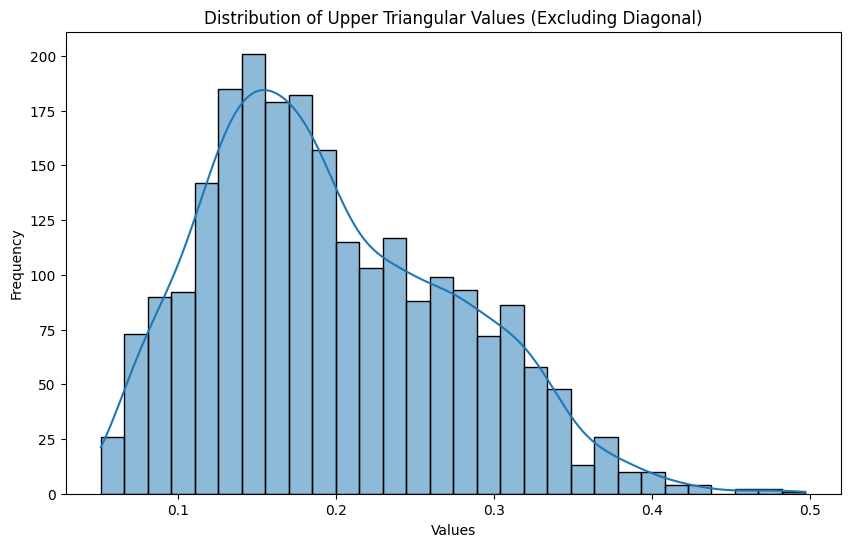

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract upper triangular values (excluding diagonal)
upper_tri_values = mind_graph.where(np.triu(np.ones(mind_graph.shape), k=1).astype(bool)).stack().values

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(upper_tri_values, bins=30, kde=True)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Upper Triangular Values (Excluding Diagonal)")
plt.show()


### ADNI Sample

c:\Users\efeka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


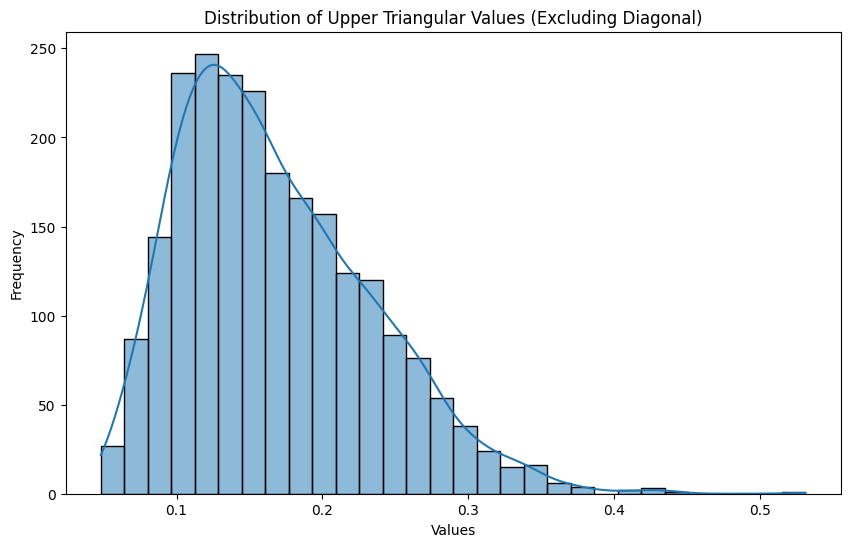

In [9]:
import pandas as pd 
adni_graph = pd.read_csv(r'mind_adni1_bl_tiny\graphs\007_S_0249.csv')
# Extract upper triangular values (excluding diagonal)
upper_tri_values = adni_graph.where(np.triu(np.ones(adni_graph.shape), k=1).astype(bool)).stack().values

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(upper_tri_values, bins=30, kde=True)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Upper Triangular Values (Excluding Diagonal)")
plt.show()